# **ActiveGraphs: Relational Graph Neural Networks**

## **Introduction**
ActiveGraphs is a key component of the **ActiveData Ecosystem**, designed to model relationships in data dynamically. Unlike traditional graphs, ActiveGraphs encodes relationships across three axes:
- **X and Y axes**: Represent the structural relationships between entities (nodes).
- **Z-axis**: Represents the actual data or attributes associated with each entity.

This expanded graph goes beyond static relationships, enabling organizations to map, explore, and interact with their data dynamically. Below, we demonstrate how ActiveGraphs can handle multiple entities, such as patients, doctors, conditions, and treatments, and visualize their interconnected relationships.

---


## **Table View: Parent-Child Relationships**
The parent-child relationship table provides a hierarchical view of the graph. This allows users to:
1. Understand how entities are connected.
2. Explore the attributes of both parent and child nodes in a structured format.
3. Simplify the complexity of relational data by visualizing it in a tabular view.

The table includes:
- **Parent Node**: The root or higher-level node in the relationship.
- **Child Node**: The dependent or connected node.
- **Parent/Child Data**: Attributes stored in each node (e.g., name, DOB, specialization).

This structured view complements the graph visualization by offering a detailed breakdown of relationships and associated data.


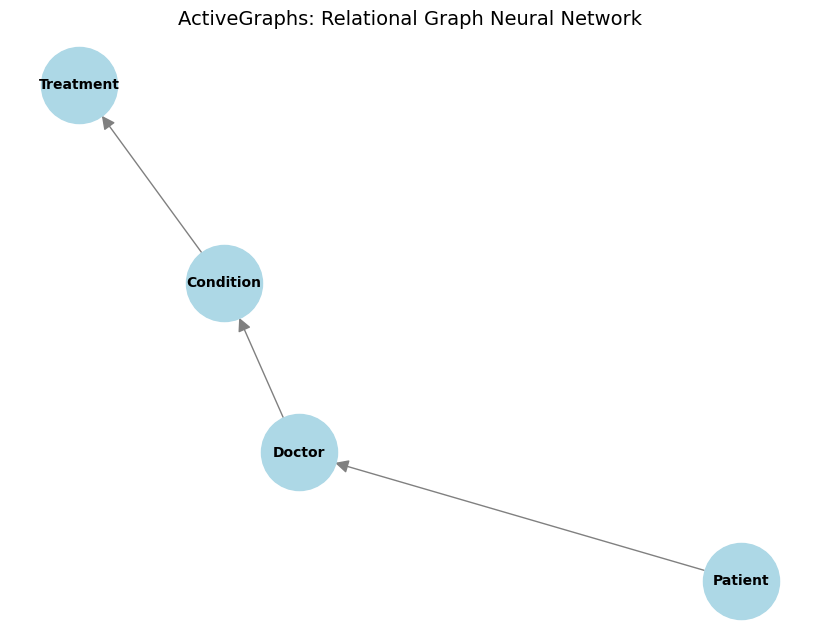

,name,DOB,specialization,dosage
Patient,John Doe,1990-01-01,NaN,NaN
Doctor,Dr. Smith,NaN,Cardiology,NaN
Condition,Hypertension,NaN,NaN,NaN
Treatment,Medication A,NaN,NaN,50mg


ActiveQube Tensor Representation:
[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 1. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]

ActiveShell Query: Get-node Patient
{'name': 'John Doe', 'DOB': '1990-01-01'}


,Level,Node,Relation
0,Root,Patient,-
1,Branch,Doctor,Treats
2,Leaf,Condition,Has


,name,DOB,specialization,dosage
Patient,John Doe,1990-01-01,NaN,NaN
Doctor,Dr. Smith,NaN,Cardiology,NaN
Condition,Hypertension,NaN,NaN,NaN
Treatment,Medication A,NaN,NaN,50mg


In [1]:
# Reimport necessary libraries after state reset
import networkx as nx
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# Step 1: ActiveGraphs - Relational Graph Neural Network Simulation
# Create a graph with relational nodes and edges
G = nx.DiGraph()

# Define nodes and attributes (X, Y axis coordinates, and data as Z-axis)
nodes = {
    "Patient": {"x": 0, "y": 0, "z": {"name": "John Doe", "DOB": "1990-01-01"}},
    "Doctor": {"x": 1, "y": 0, "z": {"name": "Dr. Smith", "specialization": "Cardiology"}},
    "Condition": {"x": 2, "y": 1, "z": {"name": "Hypertension"}},
    "Treatment": {"x": 3, "y": 2, "z": {"name": "Medication A", "dosage": "50mg"}}
}

# Add nodes to the graph
for node, attr in nodes.items():
    G.add_node(node, **attr)

# Define relationships (edges)
edges = [
    ("Patient", "Doctor"),
    ("Doctor", "Condition"),
    ("Condition", "Treatment")
]

# Add edges to the graph
G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positioning for visual clarity
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold",
    arrowsize=20, edge_color="gray"
)
plt.title("ActiveGraphs: Relational Graph Neural Network", fontsize=14)
plt.show()

# Display node data in a table (JSON structure)
node_data = {node: data["z"] for node, data in G.nodes(data=True)}
node_data_df = pd.DataFrame.from_dict(node_data, orient="index")
display(node_data_df)

# Step 2: ActiveQube - Tensor Data Structuring
# Create a tensor for multi-dimensional data (X, Y, Z)
tensor = np.zeros((4, 4, 3))  # Example dimensions
tensor[0, 0] = [1, 0, 0]  # Patient node data
tensor[1, 0] = [0, 1, 0]  # Doctor node data
tensor[2, 1] = [0, 0, 1]  # Condition node data

print("ActiveQube Tensor Representation:")
print(tensor)

# Step 3: ActiveShell - Query Simulation
# Example query: Get-node "Patient" details
def get_node_details(node_name):
    if node_name in G.nodes:
        return G.nodes[node_name]["z"]
    else:
        return "Node not found."

# Test the query
print("\nActiveShell Query: Get-node Patient")
print(get_node_details("Patient"))

# Step 4: ActiveData - Integrating components into a directory-like structure
# Simulate hierarchical and table views using pandas
hierarchy = {
    "Level": ["Root", "Branch", "Leaf"],
    "Node": ["Patient", "Doctor", "Condition"],
    "Relation": ["-", "Treats", "Has"]
}
hierarchy_df = pd.DataFrame(hierarchy)
display(hierarchy_df)

# Simulate table view of nodes and their attributes
display(node_data_df)

# Placeholder for further ActiveData ecosystem integration


## **Expanded ActiveGraphs: Overview**
The expanded graph includes:
- **Additional Nodes**: More patients, doctors, conditions, and treatments to reflect a real-world data structure.
- **Parent-Child Relationships**: Nodes are connected dynamically to reflect hierarchical relationships between entities.
- **Shared Relationships**: Nodes can have multiple connections to other entities, showcasing how relationships overlap.

### **Visualization**
- The graph below illustrates the relationships between entities.
- Each node represents a specific entity (e.g., Patient, Doctor, Condition, Treatment), while edges represent their relationships.


,Parent Node,Parent Data,Child Node,Child Data
0,Patient,"{'name': 'John Doe', 'DOB': '1990-01-01'}",Doctor,"{'name': 'Dr. Smith', 'specialization': 'Cardi..."
1,Doctor,"{'name': 'Dr. Smith', 'specialization': 'Cardi...",Condition,{'name': 'Hypertension'}
2,Condition,{'name': 'Hypertension'},Treatment,"{'name': 'Medication A', 'dosage': '50mg'}"
3,Patient1,"{'name': 'John Doe', 'DOB': '1990-01-01'}",Doctor1,"{'name': 'Dr. Smith', 'specialization': 'Cardi..."
4,Patient1,"{'name': 'John Doe', 'DOB': '1990-01-01'}",Condition2,{'name': 'Migraine'}
5,Patient2,"{'name': 'Jane Doe', 'DOB': '1985-06-15'}",Doctor2,"{'name': 'Dr. Adams', 'specialization': 'Neuro..."
6,Doctor1,"{'name': 'Dr. Smith', 'specialization': 'Cardi...",Condition1,{'name': 'Hypertension'}
7,Doctor1,"{'name': 'Dr. Smith', 'specialization': 'Cardi...",Condition2,{'name': 'Migraine'}
8,Doctor2,"{'name': 'Dr. Adams', 'specialization': 'Neuro...",Condition2,{'name': 'Migraine'}
9,Condition1,{'name': 'Hypertension'},Treatment1,"{'name': 'Medication A', 'dosage': '50mg'}"


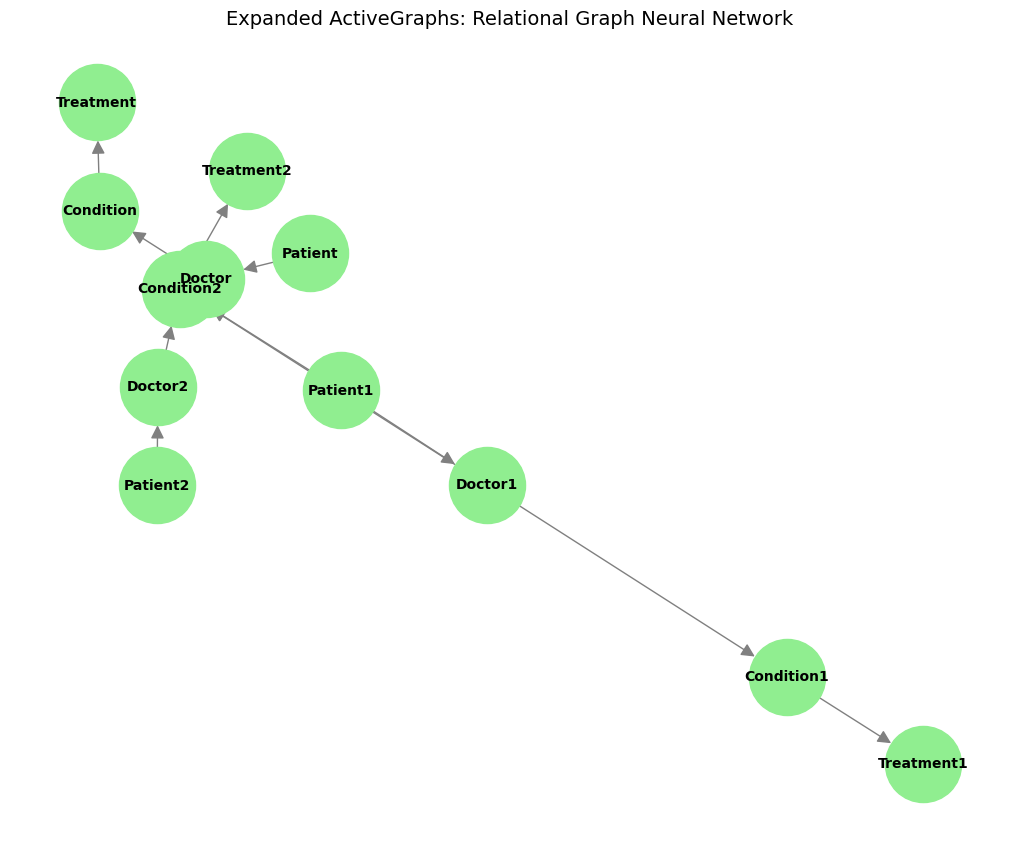

In [3]:
# Step 5: Expanding ActiveGraphs with Parent-Child Relationships

# Add more nodes to represent multiple patients, doctors, conditions, and treatments
nodes_expanded = {
    "Patient1": {"x": 0, "y": 0, "z": {"name": "John Doe", "DOB": "1990-01-01"}},
    "Patient2": {"x": 0, "y": 1, "z": {"name": "Jane Doe", "DOB": "1985-06-15"}},
    "Doctor1": {"x": 1, "y": 0, "z": {"name": "Dr. Smith", "specialization": "Cardiology"}},
    "Doctor2": {"x": 1, "y": 1, "z": {"name": "Dr. Adams", "specialization": "Neurology"}},
    "Condition1": {"x": 2, "y": 0, "z": {"name": "Hypertension"}},
    "Condition2": {"x": 2, "y": 1, "z": {"name": "Migraine"}},
    "Treatment1": {"x": 3, "y": 0, "z": {"name": "Medication A", "dosage": "50mg"}},
    "Treatment2": {"x": 3, "y": 1, "z": {"name": "Therapy B", "frequency": "Weekly"}}
}

# Add expanded nodes to the graph
for node, attr in nodes_expanded.items():
    G.add_node(node, **attr)

# Add relationships (edges) for expanded graph
edges_expanded = [
    ("Patient1", "Doctor1"),
    ("Doctor1", "Condition1"),
    ("Condition1", "Treatment1"),
    ("Patient2", "Doctor2"),
    ("Doctor2", "Condition2"),
    ("Condition2", "Treatment2"),
    ("Doctor1", "Condition2"),  # Example of shared relationships
    ("Patient1", "Condition2")  # Direct connection
]

G.add_edges_from(edges_expanded)

# Function to generate table views for each node and their children
def generate_table_view(graph):
    # Extract parent-child relationships
    table_data = []
    for parent in graph.nodes:
        for child in graph.successors(parent):
            table_data.append({
                "Parent Node": parent,
                "Parent Data": graph.nodes[parent]["z"],
                "Child Node": child,
                "Child Data": graph.nodes[child]["z"]
            })
    # Convert to pandas DataFrame for easy display
    return pd.DataFrame(table_data)

# Generate and display the table view for the expanded graph
expanded_table_view = generate_table_view(G)
display(expanded_table_view)

# Plot the expanded graph for visualization
plt.figure(figsize=(10, 8))
pos_expanded = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos_expanded, with_labels=True, node_size=3000, node_color="lightgreen", 
    font_size=10, font_weight="bold", arrowsize=20, edge_color="gray"
)
plt.title("Expanded ActiveGraphs: Relational Graph Neural Network", fontsize=14)
plt.show()


## **Conclusion**
The expanded **ActiveGraphs** demonstrates the power of dynamic relational graphs:
1. **Scalability**: By adding more entities and relationships, the graph scales to represent increasingly complex datasets.
2. **Contextual Data**: Encoding attributes along the Z-axis provides rich, actionable insights beyond basic structural relationships.
3. **Practical Applications**: This approach can be applied to diverse fields like healthcare, finance, or supply chain management.

Next, we will build a **web interface** that integrates these features. The interface will include:
- **Graph Visualization**: A live interactive graph.
- **Hierarchy Tree View**: To navigate relationships efficiently.
- **Table View**: For exploring detailed node data dynamically.

Stay tuned as we connect the dots between the backend structure and a user-friendly web interface for the **ActiveData Ecosystem**.